In [1]:
# Remove outliers (Bullets 1 and 2)

import pandas as pd
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as pyplt
import seaborn as sns
import statistics

In [2]:
raw_data_movies = pd.read_csv("tmdb_5000_movies.csv")

raw_data_movies["genres"] = raw_data_movies["genres"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["keywords"] = raw_data_movies["keywords"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["production_companies"] = raw_data_movies["production_companies"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["production_countries"] = raw_data_movies["production_countries"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["spoken_languages"] = raw_data_movies["spoken_languages"].apply(lambda x : [i["name"] for i in eval(x)])

raw_data_credits = pd.read_csv("tmdb_5000_credits.csv")

raw_data_credits["cast"] = raw_data_credits["cast"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_credits["crew"] = raw_data_credits["crew"].apply(lambda x : [i["job"] + " : " + i["name"] for i in eval(x)])

raw_data = pd.merge(raw_data_movies, raw_data_credits.drop("title", 1), left_on = "id", right_on = "movie_id").drop("movie_id", 1)

data = raw_data[(raw_data["budget"] > 0) &
                (raw_data["original_title"] is not np.nan) &
                (raw_data["popularity"] > 0) & 
                (raw_data["production_companies"].apply(len) != 0) &
                (raw_data["production_countries"].apply(len) != 0) & 
                (raw_data["release_date"] is not np.nan) &
                (raw_data["revenue"] > 0) &
                (raw_data["runtime"] > 0) &
                (raw_data["cast"].apply(len) != 0) & 
                (raw_data["crew"].apply(len) != 0)]

In [3]:
data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Editor : Stephen E. Rivkin, Production Design..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Director of Photography : Dariusz Wolski, Dir..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Original Music Composer : Thomas Newman, Dire..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Original Music Composer : Hans Zimmer, Produc..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Screenplay : Andrew Stanton, Director : Andre..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,[Comedy],http://www.miramax.com/movie/clerks/,2292,"[salesclerk, loser, aftercreditsstinger]",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[Miramax Films, View Askew Productions]",...,3151130,92.0,[English],Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,"[Brian O'Halloran, Jeff Anderson, Jason Mewes,...","[Director : Kevin Smith, Screenplay : Kevin Sm..."
4788,12000,"[Horror, Comedy, Crime]",NaN,692,"[gay, trailer park, pop culture, drug dealer, ...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,[Dreamland Productions],...,6000000,93.0,[English],Released,An exercise in poor taste.,Pink Flamingos,6.2,110,"[Divine, David Lochary, Mary Vivian Pearce, Mi...","[Director : John Waters, Screenplay : John Wat..."
4792,20000,"[Crime, Horror, Mystery, Thriller]",NaN,36095,"[japan, prostitute, hotel, based on novel, hal...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,[Daiei Studios],...,99000,111.0,[日本語],Released,Madness. Terror. Murder.,Cure,7.4,63,"[Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki...","[Director : Kiyoshi Kurosawa, Writer : Kiyoshi..."
4796,7000,"[Science Fiction, Drama, Thriller]",http://www.primermovie.com,14337,"[distrust, garage, identity crisis, time trave..

In [4]:
# Bullet Point 4

In [5]:
# Gets all genres in the dataset
unique_genre = {genre for l in data["genres"] for genre in l}
unique_genre

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western'}

In [6]:
# Gets the popularity of all genres including repeats different genres
all_info = {}
for ug in unique_genre:
    list = []
    for l in range (0,len(data["popularity"])):
        nextList = data["genres"].get(l)
        if (nextList is not None and ug in nextList):
            list.append(data["popularity"].get(l))
    all_info[ug] = list

In [7]:
# Removes any genre with no popularity
new_all_info = {key:val for key, val in all_info.items() if val}
new_all_info

{'Family': [48.681969,
  98.885637,
  53.978602,
  78.530105,
  89.186492,
  46.985445,
  49.98659,
  59.995418,
  43.349855,
  51.692953,
  125.114374,
  66.390712,
  67.391328,
  92.201962,
  36.167578,
  32.319043,
  27.082182,
  128.655964,
  94.199316,
  110.620647,
  44.041186,
  130.311355,
  203.73459,
  62.341073,
  47.323228,
  67.263269,
  42.986467,
  49.661984,
  78.144395,
  101.250416,
  53.905592,
  65.677399,
  44.141021,
  81.781591,
  165.125366,
  41.845878,
  26.710398,
  29.332905,
  51.247321,
  33.769336,
  12.362599,
  22.550135,
  48.03528,
  38.73494,
  44.989192,
  56.747978,
  61.788035,
  100.21391,
  17.7735,
  44.19092,
  44.765377,
  29.91353,
  84.366984,
  84.689648,
  63.473086,
  20.678787,
  79.679601,
  26.548594,
  115.597753,
  68.757242,
  109.984351,
  42.40024,
  45.419668,
  27.990284,
  17.060695,
  106.815545,
  64.183321,
  20.344364,
  48.780039,
  36.65422,
  19.625972,
  32.473628,
  30.475297,
  62.479574,
  132.397737,
  46.727941,
 

In [8]:
all_info = new_all_info
genres = [*all_info]
genres

['Family',
 'Romance',
 'War',
 'Documentary',
 'Drama',
 'Animation',
 'Science Fiction',
 'Horror',
 'Adventure',
 'Crime',
 'Thriller',
 'Action',
 'Comedy',
 'Western',
 'History',
 'Music',
 'Mystery',
 'Fantasy']

In [9]:
# Uses previous dictionary to get medians and means for each genre
medians = {}
means = {}

In [10]:
for g in genres:
    list = all_info.get(g)
    if(list):
        medians[g] = statistics.median(list)
        means[g] = statistics.mean(list)
median_values = [*medians.values()]
mean_values = [*means.values()]
median_val_rounded = [round(num,2) for num in median_values]
mean_val_rounded = [round(num,2) for num in mean_values]
#len(median_val_rounded)
#len(mean_val_rounded)

Text(0.5, 1.0, 'Median Popularities by Genre')

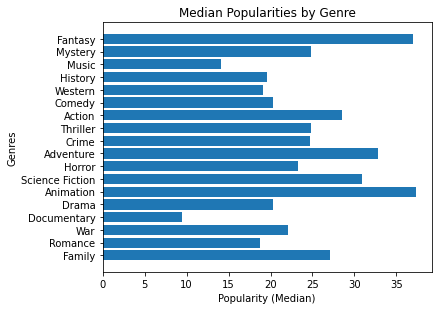

In [11]:
# Plot data
pyplt.barh(y=genres,width=median_val_rounded)
pyplt.tight_layout()
pyplt.xlabel("Popularity (Median)")
pyplt.ylabel("Genres")
pyplt.title("Median Popularities by Genre")

Text(0.5, 1.0, 'Mean Popularities by Genre')

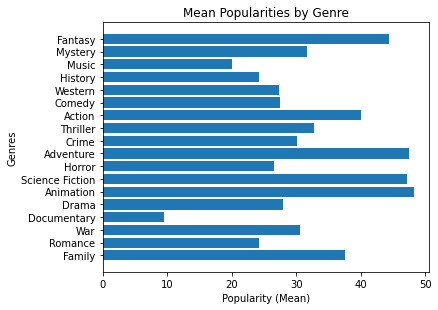

In [12]:
pyplt.barh(y=genres,width=mean_val_rounded)
pyplt.tight_layout()
pyplt.xlabel("Popularity (Mean)")
pyplt.ylabel("Genres")
pyplt.title("Mean Popularities by Genre")

In [13]:
# Via my interpretation of the question, "What are the movie genre trend shifting patterns that you can observe from the dataset?",
# I started by understanding what trends are which are usually the most popular object which means dictates that trend shifting 
# would imply an object in this case our object being movie genre that is farest away from the mean and medians. To get this 
# information, I used the dataset to find all unique genres to find the popularity means and medians for each genre. Afterwards
# I used the median and means by genre to visualize the results which displays that documentaries are the movie genre that 
# shifts the movie genre trend pattern the most since it is by far the lowest in both median and mean compared to all other movie
# genres.